In [1]:
#Muhammad Kashif
#I21-0851
#Section Y

import numpy as np
import matplotlib.pyplot as plt
import time
import math

In [2]:
# f(x) used to generate dataset
def f(x):
    return x**50 + 49*x**35 + np.exp(x*x) - np.sin(x)

In [3]:
# TODO: complete this function to compute Root Mean Squared Error
def RMSE(y_actual, y_predicted):
    # Calculate the difference between actual and predicted values
    error = y_actual - y_predicted
    # Square the errors
    error_squared = error ** 2
    # Compute the mean of squared errors
    mean_error_squared = np.mean(error_squared)
    # Take the square root to get the Root Mean Squared Error
    rmse = np.sqrt(mean_error_squared)
    return rmse

# Direct Method

## Direct Method: Compute Coefficients

In [7]:
# TODO: implement Direct (Matrix) method for polynomial interpolation
# this function should only compute the coefficients and return them in right order
def poly_coeffs_direct(x, y):
    n = len(x)  # number of data points
    X = np.zeros((n, n))  # initialize the matrix A

    # Fill the matrix X
    for i in range(n):
        X[:, i] = x ** i

    # Solve the system of linear equations to find the coefficients
    coeffs = np.linalg.solve(X, y)

    return coeffs

## Direct Method: Evaluate Polynomial

In [8]:
# TODO: this functions performs evaluation of polynomial using coefficients computed from direct method
# xx is the list of input numbers
# yy is the list of interpolated values computed
def poly_evaluation_direct(xx, coeffs):
    # Initialize an empty list to store the interpolated values
    yy = []

    # Iterate through each input number in xx
    for x in xx:
        # Initialize the value of y for this input number
        y = 0

        # Compute the value of the polynomial for the current input number
        for i, coeff in enumerate(coeffs):
            y += coeff * (x ** i)

        # Append the computed value to the list of interpolated values
        yy.append(y)

    return yy

## Direct Method: Testing

RMSE: 9.511253165963424


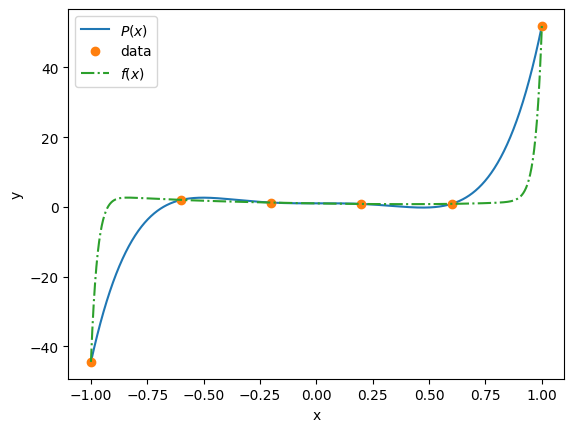

In [9]:
z = np.linspace(-1, 1, 1000)
x = np.linspace(-1, 1, 6)

y = f(x)

a = poly_coeffs_direct(x, y)

# yz are the values of the interpolating polynomial at z
yz = poly_evaluation_direct(z, a)

print('RMSE:', RMSE(f(z), yz) )

plt.plot(z,yz,'-')
plt.plot(x,y,'o')
plt.plot(z,f(z),'-.')
plt.legend(["$P(x)$","data","$f(x)$"])
plt.xlabel('x'); plt.ylabel('y'); plt.show()

RMSE: 0.03007269609827724


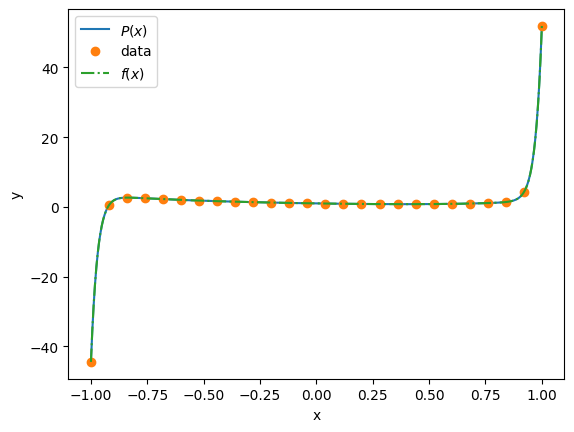

In [10]:
# TODO: Generate the plot for a polynomial of order 25.
z = np.linspace(-1, 1, 1000)
x = np.linspace(-1, 1, 26)

y = f(x)

a = poly_coeffs_direct(x, y)

# yz are the values of the interpolating polynomial at z
yz = poly_evaluation_direct(z, a)

print('RMSE:', RMSE(f(z), yz) )

plt.plot(z,yz,'-')
plt.plot(x,y,'o')
plt.plot(z,f(z),'-.')
plt.legend(["$P(x)$","data","$f(x)$"])
plt.xlabel('x'); plt.ylabel('y'); plt.show()

## Newton Method: Compute Coefficients

In [11]:
# TODO: implement Newton Divided Difference method for polynomial interpolation
# this function should only compute the coefficients and return them in right order
def poly_coeffs_newton(x, y):
    n = len(x)  # number of data points
    coeffs = np.zeros(n)  # initialize the coefficients array

    # Initialize the divided difference table
    div_diff = np.zeros((n, n))
    div_diff[:, 0] = y

    # Compute the divided differences
    for j in range(1, n):
        for i in range(j, n):
            div_diff[i, j] = (div_diff[i, j - 1] - div_diff[i - 1, j - 1]) / (x[i] - x[i - j])

    # Extract the coefficients from the divided differences
    for i in range(n):
        coeffs[i] = div_diff[i, i]

    return coeffs

## Newton Method: Evaluate Polynomial

In [12]:
# TODO: this functions performs evaluation of polynomial using coefficients computed from direct method
# z is the list of input numbers
# y is the list of interpolated values computed which will be returned
def poly_evaluation_newton(a, x, z):
    n = len(a)  # number of coefficients
    m = len(z)  # number of input numbers
    y = np.zeros(m)  # initialize the array to store interpolated values

    # Evaluate the polynomial for each input number in z
    for k, zk in enumerate(z):
        # Initialize the interpolated value for this input number
        yk = a[-1]  # start with the last coefficient

        # Compute the interpolated value using Horner's method
        for i in range(n - 2, -1, -1):
            yk = a[i] + (zk - x[i]) * yk

        # Assign the computed value to the corresponding position in y
        y[k] = yk

    return y

## Newton Method: Testing

RMSE: 9.511253165963439


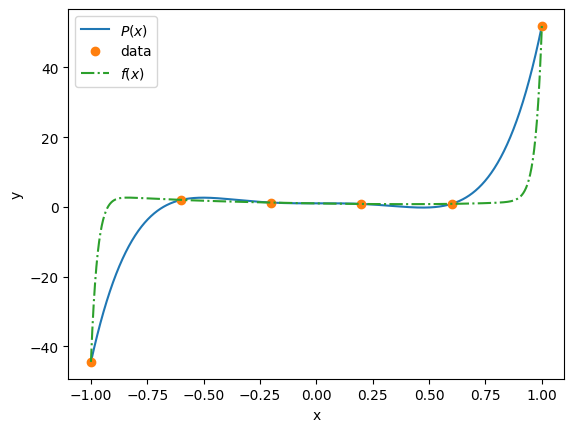

In [13]:
z = np.linspace(-1, 1, 1000)
x = np.linspace(-1, 1, 6)

y = f(x)

a = poly_coeffs_newton(x, y)

yz = poly_evaluation_newton(a, x, z)

print('RMSE:', RMSE(f(z), yz) )

plt.plot(z,yz,'-')
plt.plot(x,y,'o')
plt.plot(z,f(z),'-.')
plt.legend(["$P(x)$","data","$f(x)$"])
plt.xlabel('x'); plt.ylabel('y'); plt.show()

RMSE: 0.030072693428574833


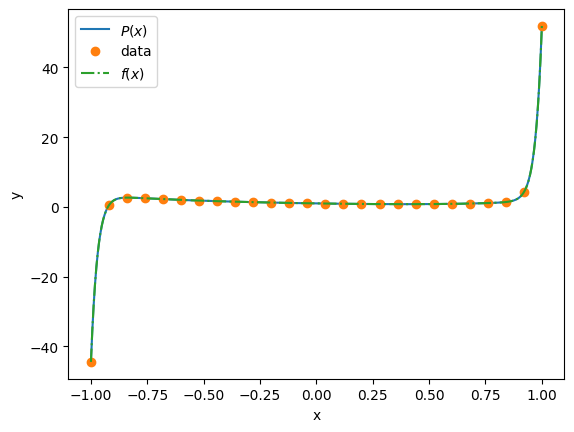

In [14]:
# TODO: Generate the plot for a polynomial of order 25.

z = np.linspace(-1, 1, 1000)
x = np.linspace(-1, 1, 26)

y = f(x)

a = poly_coeffs_newton(x, y)

yz = poly_evaluation_newton(a, x, z)

print('RMSE:', RMSE(f(z), yz) )

plt.plot(z,yz,'-')
plt.plot(x,y,'o')
plt.plot(z,f(z),'-.')
plt.legend(["$P(x)$","data","$f(x)$"])
plt.xlabel('x'); plt.ylabel('y'); plt.show()